# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book. 

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

According to Taylor series,
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= e^\frac{-\left \| \mathbf{x} \right \|^2}{2}\cdot e^\frac{-\left \| \mathbf{y} \right \|^2}{2}\cdot e^{\mathbf{x}^{T} \mathbf{y}}
= e^\frac{-\left \| \mathbf{x} \right \|^2}{2}\cdot e^\frac{-\left \| \mathbf{y} \right \|^2}{2}
\cdot \sum_{n=0}^{\infty}\frac{(\mathbf{x}^T \mathbf{y})^n}{n!}
$$

Let 
$$K'(\mathbf{x}, \mathbf{y}) = \sum_{n=0}^{\infty}\frac{(\mathbf{x}^T \mathbf{y})^n}{n!}=1+(x_1y_1+x_2y_2)+\frac{(x_1y_1+x_2y_2)^2}{2}+\cdots,
$$ 
which is a polynomial kernel of degree $n$.

Thus, $K'(\mathbf{x}, \mathbf{y})$ corresponds to kernel function 
$\phi^*(x) = [1, x_1, x_2, \frac{{x_1}^{2}}{\sqrt{2}}, x_1x_2, \frac{{x_2}^{2}}{\sqrt{2}}, ...]$, and

$$
\phi(\mathbf{x}) = e^{-\frac{||\mathbf{x}||^2}{2}} \cdot \phi^*(\mathbf{x})= e^{-\frac{||\mathbf{x}||^2}{2}} \cdot [1, x_1, x_2, \frac{{x_1}^{2}}{\sqrt{2}}, x_1x_2, \frac{{x_2}^{2}}{\sqrt{2}}, ...]
$$

To be specified, the $(\frac{n(n+1)}{2}+i+1)^{th}$ item in $\phi^*(\mathbf{x})$ is,

$$
\phi_{\frac{n(n+1)}{2}+i+1}^*(\mathbf{x}) = \frac{x_1^i x_2^{n-i}}{\sqrt{i!(n-i)!}},\quad \forall n=0,1,2,\ldots \,\,\, \textrm{and} \quad i=0,1,2,\ldots,n
$$

# Kernel SVM complexity (10 points)

How would the complexity (in terms of number of parameters) of a trained kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used as well as the amount of training data.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$


Let $n$ is the number of parameters.

For linear kernel $K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}$, the mapping function is $\phi(x)=[x_1, x_2, x_3, ..., x_n]^T$. Thus, the complexity is $\mathbf{O}(n)$. The complexity will linearly increase as the increasement of amount of training data.

For polynomial kernel, $K(\mathbf{x},\mathbf{y})=\left(\mathbf{x}^{T}\mathbf{y}+1\right)^{q}=\left(1+x_1 y_1+x_2 y_2+\ldots+x_n y_n\right)^{q}=\phi(\mathbf{x})^{T}\phi(\mathbf{y})$, where $\phi(\mathbf{x})$ has $\binom{n+q}{n}$ elements. Thus, the complexity is $\mathbf{O\left( n^q \right)}$. The complexity will increase to the power of $q$ as the increasement of amount of training data.

For RBF kernel $K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}$, as shown in Q1, the $K\left(\mathbf{x}, \mathbf{y} \right)$ can be written in the form of $\phi(\mathbf{x})^T \cdot \phi(\mathbf{y})$, in which the $\phi(\mathbf{x})$ is of infinite dimension. Thus, the complexity is infinite and remain the same when the number of parameter increases.

# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

### ML (maximum likelihood) estimation
$$
\begin{align}
arg\max_{\Theta} p(\mathbf{X} | \Theta)
&\Leftrightarrow arg\max_{\Theta} \left(exp\left(-\frac{\sum_{t=1}^{N}(x^{(t)}-\Theta)^2)}{2\sigma^2}\right)\right) 
\\
&\Leftrightarrow arg\min_{\Theta} \sum_{t=1}^N \left(\mathbf{x}^{(t)} - \Theta \right)^2 
\\
&\Rightarrow \frac{\partial }{\partial \Theta}\sum_{t=1}^N \left(\mathbf{x}^{(t)} - \Theta \right)^2 = 0 
\\
&\therefore \Theta_{ML} = \bar{x}
\end{align}
$$

<br><br>

### MAP estimation
$$
\begin{align}
arg\max_{\Theta} p(\Theta | \mathbf{X}) 
&\Leftrightarrow arg\max_{\Theta}\left(\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2} -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right) 
\\
&\Leftrightarrow arg\min_{\Theta}\left( \frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2} + \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) 
\\
&\Rightarrow \frac{\partial }{\partial \Theta}\left( \frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2} + \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) = 0 
\\
&\therefore \Theta_{MAP} = \frac{\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2}}{\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}}
\end{align}
$$

<br><br>

### Bayes estimation
$$
\begin{align}
p(\Theta|\mathbf{X})
&\propto p(\mathbf{X}|\Theta)p(\Theta)
\\
&\propto \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2} -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\\
&= \exp\left(-\frac{\sum_{t=1}^{N}{\left(\mathbf{x}^{(t)}-\bar{\mathbf{X}}\right)}^{2}+N\left(\bar{\mathbf{X}}-\Theta\right)^{2}}{2\sigma^2}-\frac{(\Theta-\mu_0)^{2}}{2{\sigma_0}^{2}}\right)
\\
&\propto \exp\left(-\frac{N\left(\bar{\mathbf{X}}-\Theta\right)^{2}}{2\sigma^2}-\frac{(\Theta-\mu_0)^{2}}{2{\sigma_0}^{2}}\right)
\\
&\propto \exp\left(-\left(\frac{N}{2\sigma^2}+\frac{1}{2{\sigma_0}^{2}}\right)\Theta^2+\left(\frac{N\bar{\mathbf{X}}}{\sigma^2}+\frac{\mu_0}{{\sigma_0}^{2}}\right)\Theta\right)
\\
&\propto
\exp\left(-\frac{(\Theta-\mu_0')^2}{2{\sigma'}^2}\right)
\\
&
where \space \mu_0' = \frac{\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2}}{\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}},\space {\sigma'}^2=\frac{1}{\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}}
\end{align}
$$

$
\therefore \Theta|\mathbf{X}\,\,\textrm{~}\,\, N\left(\mu_0',\sigma'\right) \space , and \quad
\Theta_{Bayes} = E(\Theta|\mathbf{X}) = \mu_0' = \frac{\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2}}{\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}}
$

# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

In [1]:
%load_ext watermark
%watermark -a '' -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn
%matplotlib inline

last updated: 2016-10-20 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
scipy 0.18.0
sklearn 0.17.1


In [2]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Load data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

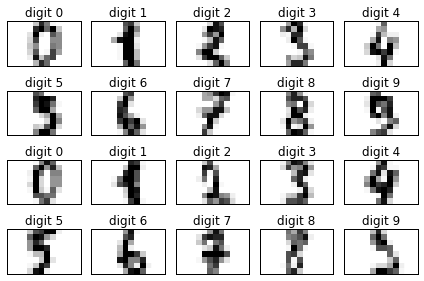

In [4]:
import matplotlib.pyplot as plt
import pylab as pl

num_rows = 4
num_cols = 5

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [5]:
#Your code comes here
import numpy as np
from sklearn.metrics import accuracy_score
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

num_training = y_train.shape[0]
num_test = y_test.shape[0]
print('training: ' + str(num_training) + ', test: ' + str(num_test))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

training: 1257, test: 540


## Classifier #1 Perceptron

In [6]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('[Perceptron] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Perceptron] Accuracy: 0.93


## Classifier #2 Logistic Regression

In [7]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('[Logistic Regression] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Logistic Regression] Accuracy: 0.94


## Classifier #3 SVM

In [8]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

#Linear SVM
svm0 = SVC(kernel='linear', C = 1.0, random_state = 0)
svm0.fit(X_train_std, y_train)
y_pred0 = svm0.predict(X_test_std)

#RBF SVM
svm1 = SVC(kernel='rbf', random_state = 0, gamma = 0.1, C = 1.0)
svm1.fit(X_train_std, y_train)
y_pred1 = svm1.predict(X_test_std)

print('[Linear SVM] Accuracy: %.2f' % accuracy_score(y_test, y_pred0))
print('[RBF SVM] Accuracy: %.2f' % accuracy_score(y_test, y_pred1))

[Linear SVM] Accuracy: 0.97
[RBF SVM] Accuracy: 0.95


## Classifier #4 Decision Tree

In [9]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
dt.fit(X_train_std, y_train)
y_pred = dt.predict(X_test_std)
print('[Decision Tree] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Decision Tree] Accuracy: 0.86


## Classifer #5 Random Forest

In [10]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
print('[Random Forest] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Random Forest] Accuracy: 0.94


## Classifier #6 KNN

In [11]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[KNN] Accuracy: 0.97


## Classifier #7 Naive Bayes

In [12]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print('[Naive Bayes] Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Naive Bayes] Accuracy: 0.77


Best classifers: *Linear SVM*, *Random Forest*, *KNN*

* KNN: deterimines the class label of a new data point by a majority vote among its k nearest neighbours. The cost of the learning process is zero. 
* Random Forest: ensembles of decision tree in some way. Weak learners are combined to build a more robust model (strong learner) that has better generalization error and is less susceptible to overfitting. 
* Linear SVM: maximizes margins to nearest samples and is more robust against outliers.

Worst classifer: *Naive Bayes* (with accuracy score 0.77), because

* Its strong feature independence assumption may not help in real practices. 
* Specifying a prior is theoratically possible but infeasible in many cases. 

